# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [1]:
# ! git clone https://github.com/eyv7jz/linearRegression

Cloning into 'linearRegression'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 77 (delta 26), reused 12 (delta 11), pack-reused 37 (from 1)
Receiving objects: 100% (77/77), 3.62 MiB | 11.94 MiB/s, done.
Resolving deltas: 100% (28/28), done.


1.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 # low_memory=False forces pandas to read the whole file into memory instead of chunks
df = pd.read_csv('./linearRegression/04_hedonic_pricing/airbnb_hw.csv', low_memory=False)
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [3]:
# the column Price is extracted from the data frame df and stored in a new variable named price
price = df['Price']
# .unique() shows the format of all price values; in this case there are commas as part of the larger values that should be removed
price.unique()

array(['145', '37', '28', '199', '549', '149', '250', '90', '270', '290',
       '170', '59', '49', '68', '285', '75', '100', '150', '700', '125',
       '175', '40', '89', '95', '99', '499', '120', '79', '110', '180',
       '143', '230', '350', '135', '85', '60', '70', '55', '44', '200',
       '165', '115', '74', '84', '129', '50', '185', '80', '190', '140',
       '45', '65', '225', '600', '109', '1,990', '73', '240', '72', '105',
       '155', '160', '42', '132', '117', '295', '280', '159', '107', '69',
       '239', '220', '399', '130', '375', '585', '275', '139', '260',
       '35', '133', '300', '289', '179', '98', '195', '29', '27', '39',
       '249', '192', '142', '169', '1,000', '131', '138', '113', '122',
       '329', '101', '475', '238', '272', '308', '126', '235', '315',
       '248', '128', '56', '207', '450', '215', '210', '385', '445',
       '136', '247', '118', '77', '76', '92', '198', '205', '299', '222',
       '245', '104', '153', '349', '114', '320', '292', '22

In [4]:
# removing all commas within numbers
price = price.str.replace(',','')
print( price.unique() , '\n')

['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1200' '158' '650' '234' '310' '695' '400' '166'
 '119' '62' '168' '340' '479' '43' '395' '144' '52' '47

In [5]:
# this converts the price values from an object format to a numeric (float or integer) format
price = pd.to_numeric(price,errors='coerce')
print( price.unique() , '\n')

[  145    37    28   199   549   149   250    90   270   290   170    59
    49    68   285    75   100   150   700   125   175    40    89    95
    99   499   120    79   110   180   143   230   350   135    85    60
    70    55    44   200   165   115    74    84   129    50   185    80
   190   140    45    65   225   600   109  1990    73   240    72   105
   155   160    42   132   117   295   280   159   107    69   239   220
   399   130   375   585   275   139   260    35   133   300   289   179
    98   195    29    27    39   249   192   142   169  1000   131   138
   113   122   329   101   475   238   272   308   126   235   315   248
   128    56   207   450   215   210   385   445   136   247   118    77
    76    92   198   205   299   222   245   104   153   349   114   320
   292   226   420   500   325   307    78   265   108   123   189    32
    58    86   219   800   335    63   229   425    67    87  1200   158
   650   234   310   695   400   166   119    62   

In [6]:
# this counts the number of missing or NaN values there is within the data;
# this just checks that the data is properly converted to values that can be used in an analysis
print( 'Total missing: ', sum( price.isnull() ) )

Total missing:  0


In [7]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [8]:
df.dropna(inplace=True)

In [9]:
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549.0,96.0
5,1039,7/25/2008,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,100.0,Entire home/apt,11222.0,1.0,1,4,149.0,100.0
6,1783,8/12/2008,Amazing Also,Manhattan,Apartment,100.0,Entire home/apt,10004.0,1.0,1,9,250.0,100.0
7,2078,8/15/2008,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,90.0,Private room,11201.0,1.0,1,80,90.0,94.0
8,2339,8/20/2008,East Village Cocoon: 2 Bedroom Flat,Manhattan,Apartment,90.0,Entire home/apt,10009.0,2.0,1,95,270.0,90.0


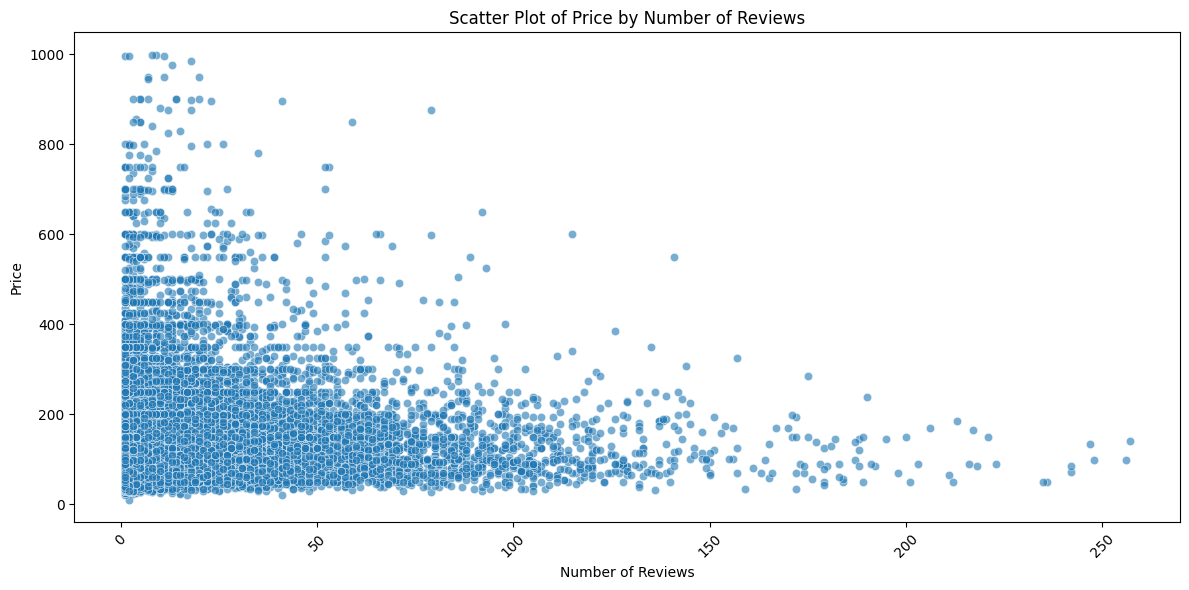

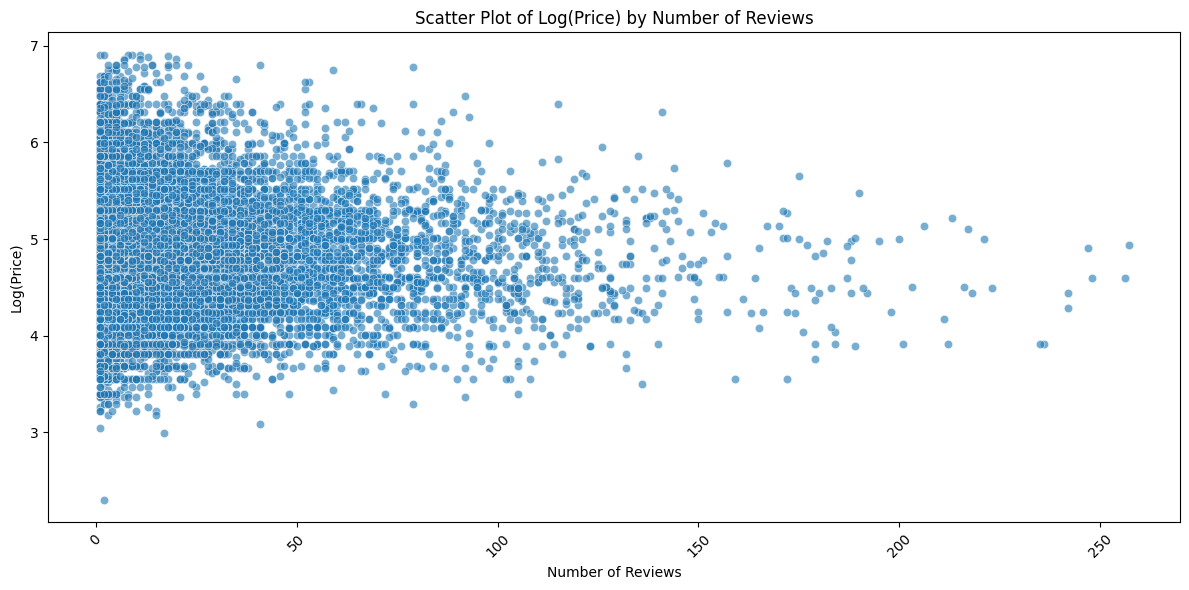

In [10]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Number Of Reviews', y='Price', data=df, alpha=0.6)
plt.title('Scatter Plot of Price by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Number Of Reviews', y=np.log(df['Price']), data=df, alpha=0.6)  # Use the log of Price
plt.title('Scatter Plot of Log(Price) by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Log(Price)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2.

In [11]:
y = df['Price']
X = pd.get_dummies(df['Room Type'], dtype='int')

from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=False).fit(X,y)

results = pd.DataFrame({'variable':reg.feature_names_in_,
                        'coefficient': reg.coef_})
results

,variable,coefficient
0,Entire home/apt,196.800377
1,Private room,88.264275
2,Shared room,67.900185


In [12]:
y = df['Price']
X = pd.get_dummies(df['Room Type'], dtype='int', drop_first = True)

from sklearn import linear_model
reg = linear_model.LinearRegression().fit(X,y)

results = pd.DataFrame({'variable':reg.feature_names_in_,
                        'coefficient': reg.coef_})
results

,variable,coefficient
0,Private room,-108.536101
1,Shared room,-128.900192


3.

In [13]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = df['Price']
X = df.loc[:,['Number Of Reviews', 'Room Type']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=100)

Z_train = pd.concat([X_train['Number Of Reviews'],
                     pd.get_dummies(X_train['Room Type'], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Number Of Reviews'],
                    pd.get_dummies(X_test['Room Type'], dtype='int')], axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)

In [14]:
y2 = df['Price']
X2 = df.loc[:,['Number Of Reviews', 'Neighbourhood ']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=.2, random_state=100)

Z2_train = pd.concat([X2_train['Number Of Reviews'],
                     pd.get_dummies(X2_train['Neighbourhood '], dtype='int')], axis = 1)
Z2_test = pd.concat([X2_test['Number Of Reviews'],
                    pd.get_dummies(X2_test['Neighbourhood '], dtype='int')], axis = 1)

reg2 = linear_model.LinearRegression(fit_intercept=False).fit(Z2_train,y2_train)

4.

In [15]:
# fitting model on test data
y_hat_test = reg.predict(Z_test)
print('Rsq Test 1: ', reg.score(Z_test,y_test))
rmse_test = np.sqrt( np.mean( (y_test - y_hat_test)**2 ))
print('RMSE Test 1: ', rmse_test)
results_test = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results_test

# fitting model on training data
y_hat_train = reg.predict(Z_train)
print('Rsq Train 1: ', reg.score(Z_train,y_train))
rmse_train = np.sqrt( np.mean( (y_train - y_hat_train)**2 ))
print('RMSE Train 1: ', rmse_train)
results_train = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results_train

Rsq Test 1:  0.29664947988107904
RMSE Test 1:  84.173678409761
Rsq Train 1:  0.2930720982552756
RMSE Train 1:  84.10147400891083


,variable,coefficient
0,Number Of Reviews,-0.047495
1,Entire home/apt,197.517331
2,Private room,89.319535
3,Shared room,67.966514


In [16]:
# fitting model on test data
y2_hat_test = reg2.predict(Z2_test)
print('Rsq Test 2: ', reg2.score(Z2_test,y2_test))
rmse_test2 = np.sqrt( np.mean( (y2_test - y2_hat_test)**2 ))
print('RMSE Test 2: ', rmse_test2)
results_test2 = pd.DataFrame({'variable':reg2.feature_names_in_, 'coefficient': reg2.coef_})
results_test2

# fitting model on training data
y2_hat_train = reg2.predict(Z2_train)
print('Rsq Train 2: ', reg2.score(Z2_train,y2_train))
rmse_train2 = np.sqrt( np.mean( (y2_train - y2_hat_train)**2 ))
print('RMSE Train 2: ', rmse_train2)
results_train2 = pd.DataFrame({'variable':reg2.feature_names_in_, 'coefficient': reg2.coef_})
results_train2

Rsq Test 2:  0.10093998228680412
RMSE Test 2:  95.16664130734611
Rsq Train 2:  0.092343155005012
RMSE Train 2:  95.2964866510696


,variable,coefficient
0,Number Of Reviews,-0.128129
1,Bronx,77.536559
2,Brooklyn,127.645651
3,Manhattan,180.235288
4,Queens,99.132873
5,Staten Island,91.567472


The first model based on room type is the better model because the RMSE is lower and the R squared is higer than the second model based on neighbourhood.

5.

In [19]:
y = df['Price']
X = df.loc[:,['Number Of Reviews', 'Room Type', 'Neighbourhood '] ]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=100)

Z_train = pd.concat([X_train['Number Of Reviews'],
                    pd.get_dummies(X_train['Room Type'], dtype='int'),
                    pd.get_dummies(X_train['Neighbourhood '], dtype='int')],
                    axis = 1)
Z_test = pd.concat([X_test['Number Of Reviews'],
                    pd.get_dummies(X_test['Room Type'], dtype='int'),
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int')],
                    axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)

# fitting model on test data
y_hat_test = reg.predict(Z_test)
print('Rsq Test 1: ', reg.score(Z_test,y_test))
rmse_test = np.sqrt( np.mean( (y_test - y_hat_test)**2 ))
print('RMSE Test 1: ', rmse_test)
results_test = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results_test

# fitting model on training data
y_hat_train = reg.predict(Z_train)
print('Rsq Train 1: ', reg.score(Z_train,y_train))
rmse_train = np.sqrt( np.mean( (y_train - y_hat_train)**2 ))
print('RMSE Train 1: ', rmse_train)
results_train = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results_train

Rsq Test 1:  0.3433743676771257
RMSE Test 1:  81.3297272621907
Rsq Train 1:  0.3413152945785134
RMSE Train 1:  81.18108204003542


,variable,coefficient
0,Number Of Reviews,-0.069388
1,Entire home/apt,134.761910
2,Private room,33.913156
3,Shared room,9.682356
4,Bronx,17.795215
5,Brooklyn,40.399957
6,Manhattan,80.518078
7,Queens,22.651544
8,Staten Island,16.992628


This complex model is a little better than the two simple models because it has a higher R squared and a lower RMSE.

6.